  **LSTM Model** for Stock Price Prediction

In [ ]:
#Importing Libraries
import math
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Getting the stock data from yahoo
stock_symbol = 'BHARTIARTL.NS'
start_date = '2014-01-01'
end_date = '2024-08-14'
df = yf.download(stock_symbol, start = start_date, end= end_date)

#Checking the collected data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,298.316162,305.526215,297.595154,304.399628,286.472473,1883623
2014-01-02,304.624969,305.526215,294.260498,296.243256,278.796509,5276461
2014-01-03,295.612396,299.127289,292.052429,296.829071,279.347778,4701341
2014-01-06,296.063019,298.000702,293.584564,296.829071,279.347778,2704888
2014-01-07,297.865540,301.470551,294.260498,298.947021,281.340973,4110547
...,...,...,...,...,...,...
2024-08-07,1452.000000,1454.900024,1422.599976,1441.750000,1441.750000,5700734
2024-08-08,1435.000000,1466.500000,1430.000000,1451.800049,1451.800049,5986360
2024-08-09,1465.000000,1482.000000,1457.300049,1464.099976,1464.099976,3615910


In [ ]:
#Showing the Number of rows and columns in data set we are working with
df.shape


(2616, 6)

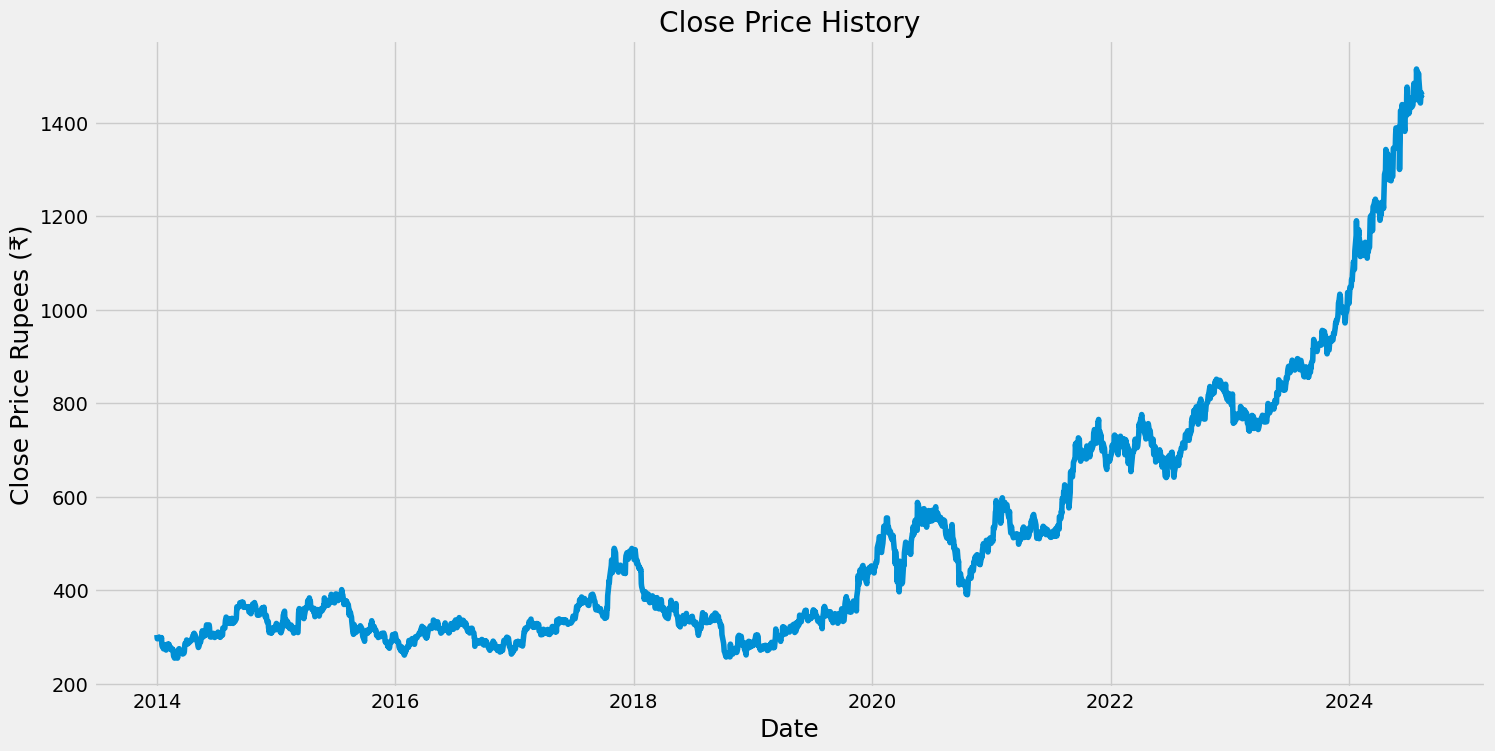

In [ ]:
#Ploting the graph for closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (₹)', fontsize=18)
plt.show()

In [ ]:
#Creating a new dataframe with only the 'Close Column'
data = df.filter(['Close'])

#Converting the df to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

#Checking the no. of rows
training_data_len

2093

In [ ]:
#Scale The Data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03935403],
       [0.03287851],
       [0.0333436 ],
       ...,
       [0.96006568],
       [0.95569911],
       [0.95657241]])

In [ ]:
#Creating the training dataset
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len]

#Split the data into x_train & y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([3.93540303e-02, 3.28785068e-02, 3.33435986e-02, 3.33435986e-02,
       3.50250861e-02, 3.55259635e-02, 3.35224782e-02, 3.42022351e-02,
       3.45242329e-02, 3.23418680e-02, 3.48819921e-02, 2.34693145e-02,
       2.01421251e-02, 1.84606133e-02, 1.58489423e-02, 1.93192499e-02,
       2.28253431e-02, 2.17520414e-02, 1.72800032e-02, 1.66360319e-02,
       1.37023630e-02, 1.85321846e-02, 2.30757697e-02, 1.65286993e-02,
       2.39701919e-02, 2.25748923e-02, 2.31473409e-02, 2.34693145e-02,
       1.73515502e-02, 1.56342771e-02, 1.80313072e-02, 1.44178813e-02,
       1.62067015e-02, 1.56700627e-02, 1.39527896e-02, 1.41674548e-02,
       1.01247228e-02, 3.86386452e-03, 3.57734947e-05, 3.11253633e-03,
       3.89962590e-03, 3.47031973e-03, 2.79056276e-03, 3.29144014e-03,
       0.00000000e+00, 2.21813839e-03, 1.37023630e-02, 1.60278219e-02,
       1.45252139e-02, 1.24501817e-02, 1.29868446e-02, 8.76520884e-03,
       8.83678006e-03, 1.21282081e-02, 9.12299224e-03, 6.94062735e-03,
     

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
#Converting the data into 3d data set
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2033, 60, 1)

In [ ]:
#Building a LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2033/2033 ━━━━━━━━━━━━━━━━━━━━ 51s 24ms/step - loss: 5.5287e-04


In [ ]:
#Create the testing dataset
#Create a new array containning scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

#Creating the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Creating the data to a numppy array
x_test = np.array(x_test)

In [ ]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict (x_test)
predictions = scaler.inverse_transform(predictions)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

41.798894901699065

<ipython-input-21-03dbaa028718>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


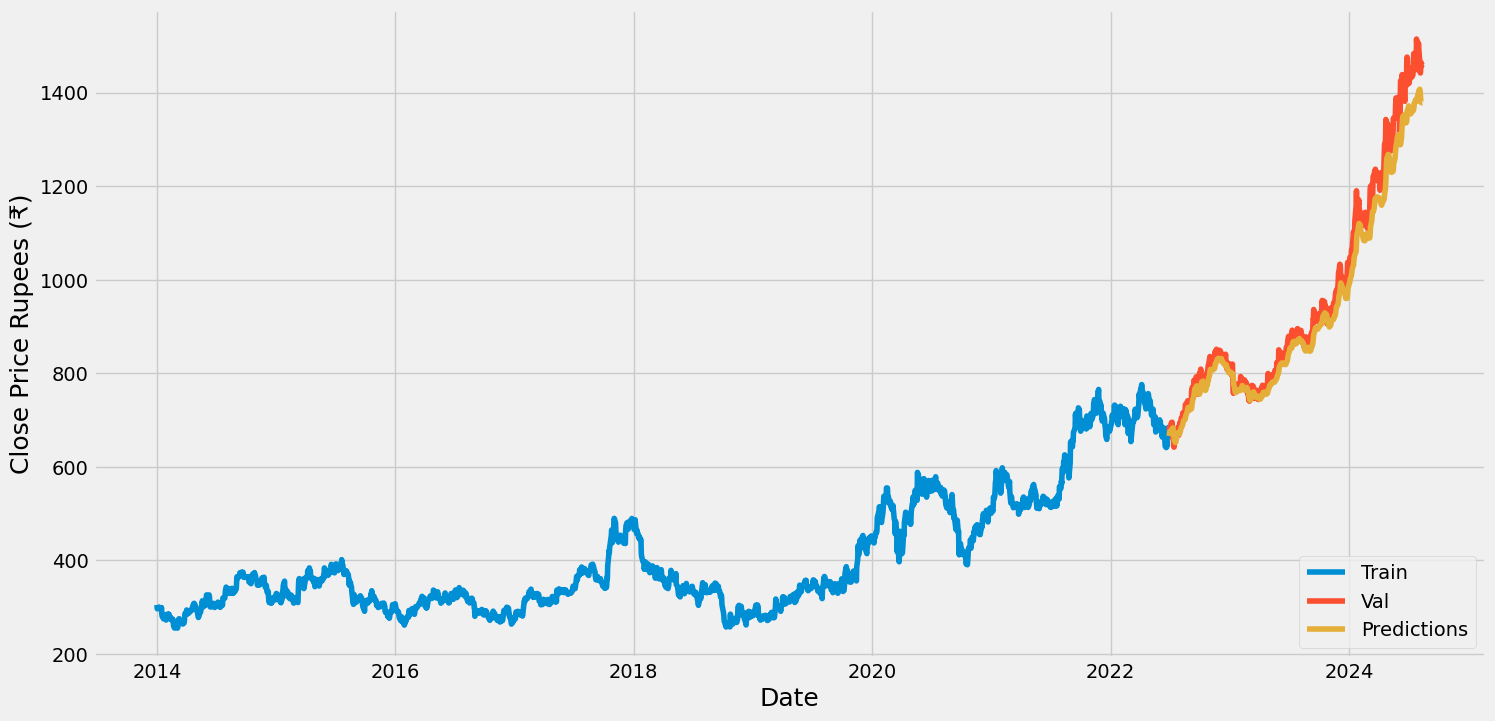

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize = (16,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (₹)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-06-29,687.799988,667.120056
2022-06-30,684.950012,673.640442
2022-07-01,673.450012,678.483765
2022-07-04,681.900024,679.685486
2022-07-05,684.450012,680.620605
...,...,...
2024-08-07,1441.750000,1455.567627
2024-08-08,1451.800049,1444.902222
2024-08-09,1464.099976,1437.726562
